# Bert Architecture
Paper: https://arxiv.org/abs/1810.04805
Youtube Video: https://www.youtube.com/watch?v=ULD3uIb2MHQ

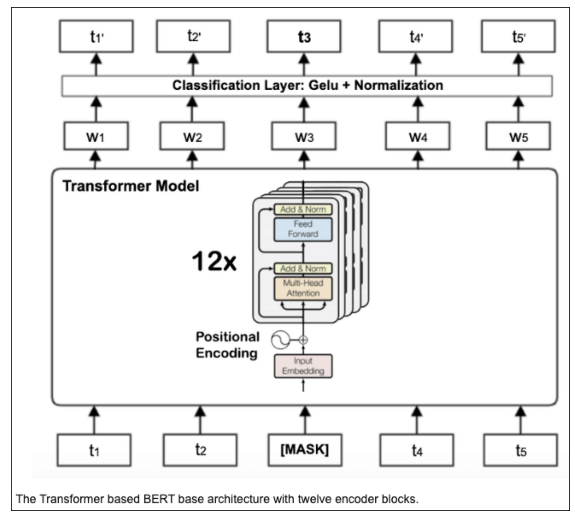

In [ ]:
import utils
utils.show_img('../NLP/img/bert_architecture.png', size_inch=10)

BERT stands for Bidirectional Encoder Representations from Transformers. It's named for its ability to encode bidirectional context using Transformer models, enabling powerful natural language understanding tasks.

Transformer vs Bert:  

The Transformer is a deep learning model introduced in the paper "Attention is All You Need" by Vaswani et al., which revolutionized the field of natural language processing (NLP) by using self-attention mechanisms instead of recurrent or convolutional layers. BERT, on the other hand, applies the Transformer architecture specifically for bidirectional language modeling tasks.

Therefore, BERT can be seen as a specific application or variant of the Transformer model, adapted and fine-tuned for tasks such as pre-training on large text corpora followed by fine-tuning on specific downstream tasks like classification, question answering, and more.

BERT incorporates ideas from ELMO and GPT by enhancing bidirectionality, leveraging transformer architecture, adopting large-scale pre-training, and refining contextual word embeddings.

Why BERT needs positional embedding?

BERT needs positional embeddings to provide the model with information about the order or position of words in a sequence. Unlike recurrent neural networks (RNNs), which inherently capture sequence order through their sequential nature, transformer-based models like BERT do not have a built-in mechanism to understand the sequential order of tokens.

Positional embeddings in BERT are implemented by adding fixed-size vectors to the input embeddings of each token. These vectors encode the position or order of each token in the sequence. The positional embeddings are learned during training along with other parameters of the model.

In [ ]:
import torch
import torch.nn as nn

# Assuming max sequence length and embedding size
max_seq_length = 512
embedding_size = 768

# Create positional embedding matrix
position_embeddings = nn.Embedding(max_seq_length, embedding_size)

# Example input tensor (batch_size=1, sequence_length=512, embedding_size=768)
input_ids = torch.tensor([[1, 2, 3, ... 512]], dtype=torch.long)

# Generate position indices (0 to 511) for the input sequence
position_ids = torch.arange(max_seq_length, dtype=torch.long)[None, :]

# Expand position_ids to match the shape of input_ids
position_ids = position_ids.expand(input_ids.shape)

# Fetch positional embeddings for the input sequence
position_embeddings = position_embeddings(position_ids)

# Add positional embeddings to input embeddings
input_embeddings = input_embeddings + position_embeddings


How is BERT trained?

BERT is trained using two main techniques: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). MLM involves masking random tokens in a sentence and predicting them based on context. NSP evaluates if two sentences are consecutive in the original text. These methods help BERT learn language patterns without human-labeled data, making it effective for various tasks after pre-training.

Hyper-parameters need to adjust for fine-tuning a BERT model:

Learning Rate: Determines how much to change the model in response to the estimated error each time the model weights are updated. Typical range:
10(e -5) to 10 (e -3)

Batch Size: Number of training examples utilized in one iteration. Larger batch sizes can lead to faster training but require more memory. Typical range: 16 to 32.

Number of Epochs: Number of times the entire training dataset is passed forward and backward through the neural network. Typically, this depends on the specific task and dataset.

Warmup Steps: Number of training steps during which the learning rate increases linearly from 0 to the initial learning rate. Helps stabilize training. Typical range: 100 to 1000.

Weight Decay: Regularization parameter that penalizes large weights. Helps prevent overfitting. Typical range: 10 (e-4) to 10 (e -6)

Dropout: Probability of dropping neurons in the neural network during training to prevent overfitting. Typical range: 0.1 to 0.5.

Max Sequence Length: Maximum length of input sequences accepted by the model. Sequences longer than this are truncated or split. Typical range: 128 to 512.

# T5 and BART
Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer
https://arxiv.org/abs/1910.10683
T5 is the model google proposed to complement Bert.

Bert vs T5/BART. Tasks T5/BART might be better at than Bert:

BERT focuses on bidirectional representation learning through masked language modeling (MLM), while T5 and BART excel in sequence-to-sequence tasks and text generation. T5 and BART are better suited for tasks like summarization, translation, and complex text generation due to their text-to-text framework, which allows them to handle both input and output as text sequences effectively. In contrast, BERT is widely used for tasks requiring understanding of bidirectional context and semantics within sentences.

T5/BART pre-trained:


Dual Approach: BART combines bidirectional (like BERT) and auto-regressive (like GPT) approaches. It masks random tokens during training (like BERT) and also trains the model to predict the following sequence (like GPT).
Pre-training Objective: BART is pre-trained using denoising objectives, such as corrupting input text and training the model to reconstruct the original text. It also uses a fill-mask task similar to BERT.
Dataset: BART leverages a large corpus of text data, focusing on generating coherent and well-formed text outputs, suitable for tasks like summarization and text generation.

# Application

 Transfer learning and fine-tuning:

Transfer learning involves using knowledge gained from solving one problem to help solve a different but related problem. Fine-tuning is a type of transfer learning where a pre-trained model is adjusted slightly to fit a new task or dataset. We fine-tune models instead of training from scratch because it speeds up convergence, requires less data, and often leads to better performance due to leveraging previously learned features.

Parameters are tuned when training a bert based model:

Learning Rate: Controls the step size during gradient descent. It's crucial for controlling the convergence speed and stability of the training process.

Batch Size: Determines the number of samples propagated through the network before updating the weights. It affects memory usage and training speed.

Number of Epochs: Specifies how many times the entire dataset is passed through the model. It impacts how well the model learns from the data.

Optimizer Choice: Determines the algorithm used for optimizing the model, such as Adam, SGD, or others. Each optimizer has its own hyperparameters (like momentum for SGD or beta parameters for Adam) that can be tuned.

Dropout Probability: Controls the rate at which neurons are randomly dropped during training to prevent overfitting.

Fine-tuning Layers: Specifies which layers of the pre-trained BERT model are fine-tuned. This can range from fine-tuning only the classification layer to fine-tuning the entire model.

Warmup Steps: Determines the number of steps taken to increase the learning rate linearly from zero to the specified learning rate. Helps stabilize training and prevent large changes in weights early in training.

Weight Decay: Regularization parameter that penalizes large weights to prevent overfitting.

Attention Masking: Depending on the task, the attention masking strategy might need adjustments. For example, for sentence-pair tasks, different masking strategies can be applied.

Learning Rate Scheduler: Adjusts the learning rate during training based on a predefined schedule or performance metrics. Helps improve convergence and generalization.

 Model distillation


Model distillation is a technique where knowledge from a large, complex model (teacher model) is transferred to a smaller, more efficient model (student model). This process is crucial for making powerful AI models more lightweight and faster, suitable for deployment on devices with limited resources. It improves efficiency, speeds up inference, reduces costs, and often enhances generalization performance compared to training smaller models from scratch.

## Bert based Classification using triplet loss and contrastive learning.

In this part, I conduct a fine-tuning of Bert model for sentiment analysis.
To make it more fun and fancy, I don't use the crossEntropy loss function that compares prediction with labels directly. Instead, I use triplet loss.

Triplet loss is essential to constrstive learning, and it plays a major part in pre-training process of LLM and recent CV transformer models. The basic idea of constrastive learning is: I want the sources in the same group to be close with each other in latent space (embedding), and sources from different groups to be far away in latent space (embedding). To conduct this, triplet loss is used.

Data used: Large Movie Review Dataset v1.
 http://www.aclweb.org/anthology/P11-1015

Ref: Potts, Christopher. 2011. On the negativity of negation. In Nan Li and
David Lutz, eds., Proceedings of Semantics and Linguistic Theory 20,
636-659.


In [2]:
!pip install jupyterplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import shutil
import random
from jupyterplot import ProgressPlot
import time
import math

import time
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for lrcurve: filename=lrcurve-1.1.0-py3-none-any.whl size=69123 sha256=8b16416c63cc31b1694d29507b155d66d2c4d08c63da9a1d2713073e74f2865b
  Stored in directory: /root/.cache/pip/wheels/db/3b/df/2b8b6f4b333df04960460f43842d59bfcf455afa6c01fcc2e8
Successfully built lrcurve


In [3]:
df_all = pd.read_csv('/content/all_train.csv')

In [4]:
df_all = df_all.sample(5000,random_state=1)

df_all.reset_index(drop=True,inplace=True)
df_all

,description,y
0,"Taut and organically gripping, Edward Dmytryk'...",1.0
1,People criticize NSNA because it is a low-poin...,1.0
2,Why did I vote 10/10 for this movie that is ju...,1.0
3,I saw this movie on Mystery Science Theater 30...,0.0
4,I've read many negative reviews of this movie ...,1.0
...,...,...
4995,Hitchcock's original classic benefited tremend...,0.0
4996,"I enjoyed the movie very much, emotionally, in...",0.0
4997,then the second half of this movie is hard to ...,0.0
4998,I really can't believe this movie is not in th...,0.0


In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42)


In [6]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [7]:
df_train

,description,y
0,Mina Kumari exhibits more style and grace just...,1.0
1,"""Batman: The Mystery of the Batwoman"" is about...",1.0
2,I had been looking forward to seeing this film...,0.0
3,CAMP BLOOD Aspect ratio: 1.33:1 (Nu-View 3-D)S...,0.0
4,Gadar is a really dumb movie because it tells ...,0.0
...,...,...
3345,Despite being a sequel to the more potent orig...,0.0
3346,HAPPY DAYS was one of my favorite shows when i...,0.0
3347,I have been watching this show since I was 14 ...,1.0
3348,I saw that movie few days ago. This movie is s...,1.0


In [8]:
df_test

,description,y
0,It is the best film i have seen in the last 5 ...,1.0
1,"I remember this movie from when i was 12, it w...",1.0
2,"Jodie Foster, Cherie Currie (the former lead s...",1.0
3,Clara Lago is wonderful as the title character...,1.0
4,John Leguizamo's one man shows are hit or miss...,1.0
...,...,...
1645,"From a military historian's standpoint, nearly...",1.0
1646,Low budget junk about bloodthirsty cultists in...,0.0
1647,"Lynne Ramsey makes arresting images, and Saman...",0.0
1648,If I assume that you know what this film is ab...,1.0


# Fine-tuning Bert using contrastive learning

In [9]:
# V1
#loss_func = T.nn.TripletMarginLoss()
#loss_val = loss_func(anch, pos, neg)
!pip3 install transformers
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

from torch import nn
from transformers import BertModel

from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import random
from torch.optim import Adam
from tqdm import tqdm

batch_size=32
epochs = 5

labels = {0:0,
          1:1,
          2:2,
          3:3,
          4:4,
          5:5
          }

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Construct Triplet dataset.
It is quite different from normal dataset. It needs a pair of positive and negative samples.

In [10]:
class TripletDataset(torch.utils.data.Dataset):

    def __init__(self, df, train=True):
        self.is_train = train

        self.labels = df['y'] #[labels[label] for label in df['label']]
        self.texts = [tokenizer(str(text),
                               padding='max_length', max_length = 64, truncation=True,
                                return_tensors="pt") for text in df['description'].tolist()]
        #self.texts = [self.bert_text_preparation(text) for text in df['item_name'].tolist()]
        self.index = df.index.values
        self.raw = df['description'].tolist()


    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)


    def __getitem__(self, idx):

        anchor_text = self.texts[idx]
        anchor_raw = self.raw[idx]
        if self.is_train:
            anchor_label = self.labels[idx]
            positive_list = self.index[self.index!=idx][self.labels[self.index!=idx]==anchor_label]

            positive_item = random.choice(positive_list)
            positive_text = self.texts[positive_item]
            positive_raw = self.raw[positive_item]

            negative_list = self.index[self.index!=idx][self.labels[self.index!=idx]!=anchor_label]
            negative_item = random.choice(negative_list)
            negative_text = self.texts[negative_item]
            negative_raw = self.raw[negative_item]
            return anchor_text, positive_text, negative_text, anchor_label, (anchor_raw,positive_raw,negative_raw)

        else:
            return anchor_text


In [12]:

train_ds = TripletDataset(df_train, train=True)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)

train_ds[0]
torch.cuda.empty_cache()

### Define tripletloss and train the model
It's simple and elegant!

In [13]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def calc_euclidean(self, x1, x2):
        return (x1 - x2).pow(2).sum(1)

    def forward(self, anchor: torch.Tensor, positive: torch.Tensor, negative: torch.Tensor) -> torch.Tensor:
        distance_positive = self.calc_euclidean(anchor, positive)
        distance_negative = self.calc_euclidean(anchor, negative)
        losses = torch.relu(distance_positive - distance_negative + self.margin)

        return losses.mean()




class BertEmbedding(nn.Module):

    def __init__(self, dropout=0.5):

        #super(BertClassifier, self).__init__()
        super(BertEmbedding, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased',output_hidden_states=True)

    def forward(self, input_id, mask):

        _, pooled_output,_hidden_states = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        # Getting embeddings from the final BERT layer
        token_embeddings = _hidden_states[-1]
        # Collapsing the tensor into 1-dimension
        token_embeddings = torch.squeeze(token_embeddings, dim=0)
        # Converting torchtensors to lists
        list_token_embeddings = [token_embed.tolist() for token_embed in token_embeddings]

        return token_embeddings


def init_weights(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_normal_(m.weight)

In [14]:
model = BertEmbedding()
#model.apply(init_weights)
#model = torch.jit.script(model).to(device)

use_cuda = True #False # GPU 16G ram
device = torch.device("cuda" if use_cuda else "cpu")

optimizer = optim.Adam(model.parameters(), lr=0.00001)
#criterion = torch.jit.script(TripletLoss())
#criterion = TripletLoss(margin=10)
criterion = torch.nn.TripletMarginLoss()



if use_cuda:

        model = model.cuda()
        criterion = criterion.cuda()


model.train()
for epoch in tqdm(range(epochs), desc="Epochs"):
    running_loss = []
    for step, (anchor_text, positive_text, negative_text, anchor_label, raw) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        anchor_mask = anchor_text['attention_mask'].squeeze(1).to(device)
        anchor_input_id = anchor_text['input_ids'].squeeze(1).to(device)
        positive_mask = positive_text['attention_mask'].squeeze(1).to(device)
        positive_input_id = positive_text['input_ids'].squeeze(1).to(device)
        negative_mask = negative_text['attention_mask'].squeeze(1).to(device)
        negative_input_id = negative_text['input_ids'].squeeze(1).to(device)

        optimizer.zero_grad()
        anchor_out = model(anchor_input_id, anchor_mask)
        positive_out = model(positive_input_id, positive_mask)
        negative_out = model(negative_input_id, negative_mask)

        loss = criterion(anchor_out, positive_out, negative_out)
        loss.backward()
        optimizer.step()

        running_loss.append(loss.cpu().detach().numpy())
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, epochs, np.mean(running_loss)))

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Training:   0%|          | 0/105 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

Epochs:  20%|██        | 1/5 [02:05<08:22, 125.70s/it]

Epoch: 1/5 - Loss: 1.0197



Epochs:  40%|████      | 2/5 [04:10<06:15, 125.06s/it]

Epoch: 2/5 - Loss: 0.6929



Epochs:  60%|██████    | 3/5 [06:12<04:07, 123.74s/it]

Epoch: 3/5 - Loss: 0.5238



Epochs:  80%|████████  | 4/5 [08:10<02:01, 121.66s/it]

Epoch: 4/5 - Loss: 0.3317



Epochs: 100%|██████████| 5/5 [10:07<00:00, 121.60s/it]

Epoch: 5/5 - Loss: 0.1888


In [22]:
# Save the model
torch.save(model.state_dict(), 'model_tripletloss_multi.model')


In [23]:
model = BertEmbedding()
model.load_state_dict(torch.load('model_tripletloss_multi.model'))
model.eval()

<ipython-input-23-6b0e2d2bb033>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_tripletloss_multi.model'))


BertEmbedding(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise

## Extract Bert Embedding after fine-tuning.
The new dataset is different from TripletDataset.

In [24]:
# Bert Embedding TSNE after fine tuning
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['y']]
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 64, truncation=True,
                                return_tensors="pt") for text in df['description'].tolist()]
        #self.texts = [self.bert_text_preparation(text) for text in df['item_name'].tolist()]


    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


In [25]:
pred = Dataset(df_test)
pred_dataloader = torch.utils.data.DataLoader(pred, batch_size=32,shuffle=False)

use_cuda = torch.cuda.is_available()
#use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")

if use_cuda:
    model = model.cuda()

target_word_embeddings = []
for pred_input, pred_label in tqdm(pred_dataloader):

    pred_label = pred_label.to(device)
    mask = pred_input['attention_mask'].squeeze(1).to(device)
    input_id = pred_input['input_ids'].squeeze(1).to(device)
    output = model(input_id, mask)
    for item in output:
        target_word_embeddings.append(item[0].to('cpu').tolist())

100%|██████████| 52/52 [00:08<00:00,  6.00it/s]


In [26]:
target_word_embeddings_np = np.array(target_word_embeddings)
print(target_word_embeddings_np.shape, len(target_word_embeddings))

(1650, 768) 1650


BERT extracts embeddings by processing input tokens through a stack of transformer layers. These layers enable BERT to capture contextualized representations of each token in relation to its surrounding tokens within the input sequence. This process allows BERT to encode rich semantic information into the embeddings.
The embedding is obtained from the output of the model. Each item is a tensor, and the first element (`item[0]`) is extracted, moved to CPU, converted to a list and appended to the `target_word_embeddings`.


The reason why output one token can represent the whole text is because the model is trained to ensure the first token's output captures the aggregate meaning and important features of the input text. Each token's representation is influenced by all other tokens. Specifically, the `[CLS]` token, which is the first token in BERT model, is designed and trained to capture the overall context of the entire input sequence. So that's why it works.

Another way of extracting embedding is using the [CLS] token embedding. Example implementation

Note: extracting output of one token can represent the whole text

In [30]:
cls_embeddings = []
for pred_input, pred_label in tqdm(pred_dataloader):

    pred_label = pred_label.to(device)
    mask = pred_input['attention_mask'].squeeze(1).to(device)
    input_id = pred_input['input_ids'].squeeze(1).to(device)
    output = model(input_id, mask)
    cls_embeddings.extend(output[:, 0, :].cpu().tolist())


100%|██████████| 52/52 [00:09<00:00,  5.38it/s]


In [31]:
np.array(cls_embeddings).shape

(1650, 768)

In [33]:
target_word_embeddings = target_word_embeddings_np[0:len(df_test)]

During training, particularly for classification tasks, this token is used to aggregate and encode the entire sequence's context. By using self-attention mechanisms, it effectively gathers information from all other tokens in the sequence. Thus, the embedding of this single token can capture a comprehensive representation of the entire text, making it useful for tasks that require understanding or summarizing the overall meaning of the input.

## Visulization of embedding

In [34]:
from sklearn.manifold import TSNE
import seaborn as sns

target_word_embeddings_array = np.array(target_word_embeddings)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
#tsne_pca_results = tsne.fit_transform(pca_result_50)
tsne_results = tsne.fit_transform(target_word_embeddings_array)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 6.6872406005859375 seconds


In [35]:
df_test['tsne-one'] = tsne_results[:,0]
df_test['tsne-two'] = tsne_results[:,1]

(-15.0, 15.0)

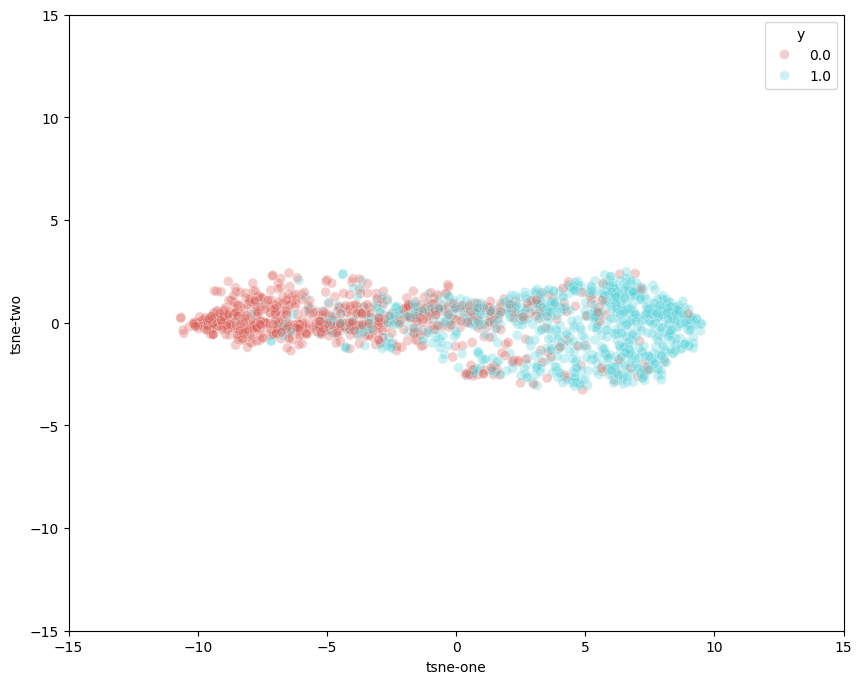

In [38]:
plt.figure(figsize=(10,8))
hue = 'y'
ax3 = plt.subplot(1, 1, 1)
sns.scatterplot(
        x="tsne-one", y="tsne-two",
        hue='y',
        palette=sns.color_palette("hls",2),
        data=df_test,
        legend="full",
        alpha=0.3,
        ax=ax3, s=50
    )

plt.xlim([-15,15])
plt.ylim([-15,15])



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_test[['tsne-one', 'tsne-two']]
y = df_test['y']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       161
         1.0       0.81      0.80      0.81       169

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



# Adjust the hyperparameters and improve the performance.



In [42]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a logistic regression model
lr_hyper = LogisticRegression()

# Create grid search
grid_search = GridSearchCV(estimator=lr_hyper, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(grid_search.best_params_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'C': 0.01, 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [43]:
print(grid_search.best_params_)

{'C': 0.01, 'solver': 'newton-cg'}


In [44]:
model_lr_gs = LogisticRegression(C=0.01, solver='newton-cg')

# Train the model
model_lr_gs.fit(X_train, y_train)

# Predict the labels
y_pred_gs = model_lr_gs.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       161
         1.0       0.81      0.80      0.81       169

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


# Add classification layer to the model and output sentiment analysis result directly.

Create pytorch dataset

In [45]:
class SentimentDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = 64

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]['description']
        labels = self.data.iloc[index][['y']].values.astype(int)
        encoding = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=self.max_length)
        input_ids = encoding['input_ids'][0]
        attention_mask = encoding['attention_mask'][0]
        # resize the tensors to the same size
        input_ids = nn.functional.pad(input_ids, (0, self.max_length - input_ids.shape[0]), value=0)
        attention_mask = nn.functional.pad(attention_mask, (0, self.max_length - attention_mask.shape[0]), value=0)
        return input_ids, attention_mask, torch.tensor(labels, dtype=torch.long)

Define the BERT tokenizer and converts our train and test Pandas DataFrames into PyTorch datasets

In [46]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = SentimentDataset(df_train, tokenizer)
test_dataset = SentimentDataset(df_test, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Employ the PyTorch DataLoader class to transform our PyTorch datasets into iterable objects that can be processed in batches

In [47]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Define a SentimentClassification Class. The classifier directly outputs 768 dim to 2 classes. Training the model.

In [48]:
class BertForSentimentClassification(nn.Module):
    def __init__(self, dropout=0.5, num_classes=2):
        super(BertForSentimentClassification, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased', output_hidden_states=True)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(768, num_classes)

    def forward(self, input_id, mask):
        _, pooled_output, _ = self.bert(input_ids=input_id, attention_mask=mask, return_dict=False)
        dropout_output = self.dropout(pooled_output)
        logits = self.classifier(dropout_output)
        return logits

from collections import OrderedDict

# Instantiate the classification model
model = BertForSentimentClassification(num_classes=2)

# Load your fine-tuned BERT model weights
fine_tuned_state_dict = torch.load('model_tripletloss_multi.model')

# Create a new state_dict for the BERT part only
new_state_dict = OrderedDict()
for key, value in fine_tuned_state_dict.items():
    if key.startswith("bert."):
        new_key = key[len("bert."):]  # Remove "bert." prefix
        new_state_dict[new_key] = value

# Load the state_dict into the BERT component
model.bert.load_state_dict(new_state_dict)

# Move the model to GPU if available
if use_cuda:
    model = model.cuda()

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
if use_cuda:
    criterion = criterion.cuda()


<ipython-input-48-ef042ac5f830>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fine_tuned_state_dict = torch.load('model_tripletloss_multi.model')


Evaluate the model

In [49]:
# Training loop
model.train()
for epoch in range(5):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for step, (input_ids, attention_mask, labels) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        input_mask = attention_mask.squeeze(1).to(device)
        input_id = input_ids.squeeze(1).to(device)
        labels = labels.to(device).view(-1)

        optimizer.zero_grad()
        outputs = model(input_id, input_mask)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        total_predictions += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    accuracy = correct_predictions.double() / total_predictions
    print(f"Epoch: {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch: 1/5, Loss: 0.2866, Accuracy: 0.8854


Epoch: 2/5, Loss: 0.0999, Accuracy: 0.9719


Epoch: 3/5, Loss: 0.0800, Accuracy: 0.9782


Epoch: 4/5, Loss: 0.0503, Accuracy: 0.9884


Epoch: 5/5, Loss: 0.0409, Accuracy: 0.9913


The difference between contrastive loss and triplet loss and their pros and cons.

Contrastive loss and triplet loss are both used for learning embeddings in tasks like siamese networks or metric learning:

Contrastive Loss: Focuses on pairs of examples, encouraging similar pairs to be close and dissimilar pairs to be far apart. It's straightforward but limited to pairs and sensitive to the margin parameter.

Triplet Loss: Considers triplets (anchor, positive, negative), penalizing when the distance between the anchor and the negative example is closer than to the positive by a margin. It's more nuanced but computationally expensive and sensitive to triplet selection.

Choose contrastive loss for clear pair distinctions; triplet loss for learning nuanced relationships with ample triplet data.

## Implement contrastive loss for the sentiment analysis example above.

Define the Sentiment Analysis Model

In [50]:
class BertForSequenceClassification(nn.Module):
    def __init__(self, num_labels):
        super(BertForSequenceClassification, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  # Use the pooled output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

num_labels = 2  # For binary classification
model = BertForSequenceClassification(num_labels)
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Define Constrastive Loss

In [51]:

class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

contrastive_loss = ContrastiveLoss()


Train the model

In [52]:

# Define the optimizer
optimizer = Adam(model.parameters(), lr=2e-5)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model and loss function to the GPU
model.to(device)
contrastive_loss.to(device)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):  # Adjust the number of epochs as needed
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids, attention_mask, labels = batch

        # Move the batch tensors to the GPU
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        # Get the outputs from the model
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]

        # Split the outputs into pairs for contrastive loss
        output1 = pooled_output[::2]
        output2 = pooled_output[1::2]
        label_pairs = (labels[::2] == labels[1::2]).float()  # 1 if the same, 0 if different

        # Compute the contrastive loss
        loss = contrastive_loss(output1, output2, label_pairs)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

Epoch 1/3: 100%|██████████| 105/105 [00:51<00:00,  2.03it/s]


Epoch 1, Loss: 0.3506681623912993


Epoch 2/3: 100%|██████████| 105/105 [00:50<00:00,  2.10it/s]


Epoch 2, Loss: 0.343851072873388


Epoch 3/3: 100%|██████████| 105/105 [00:50<00:00,  2.10it/s]

Epoch 3, Loss: 0.34951115137054806


Evaluate the model

In [53]:
all_labels = []
all_preds = []

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for i, batch in enumerate (test_loader):

    input_ids, attention_mask, labels = batch
    input_ids = input_ids.to(device)

    attention_mask = attention_mask.to(device)

    labels = labels.view(-1)
    labels = labels.to(device)

    outputs = model(input_ids, attention_mask)

    _, predictions = torch.max(outputs, 1)

    all_labels.append(labels.cpu().numpy())
    all_preds.append(predictions.cpu().numpy())

all_labels = np.concatenate(all_labels, axis=0)
all_preds = np.concatenate(all_preds, axis=0)

print(classification_report(all_labels, all_preds))
print(accuracy_score(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46       783
           1       0.54      0.61      0.58       867

    accuracy                           0.52      1650
   macro avg       0.52      0.52      0.52      1650
weighted avg       0.52      0.52      0.52      1650

0.5230303030303031


It looks like the model with triplet loss outperformed the one with constractive loss. (accuracy 0.8 vs. 0.5)